In [1]:
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from tqdm import tqdm

In [2]:
xx, yy = np.meshgrid(np.linspace(0.001,1,50), np.linspace(0.001,1,50))
whole_plane = np.c_[xx.ravel(), yy.ravel()]
bisx, bisy = np.meshgrid(np.linspace(-1,1,50), np.linspace(-1,1,50))

In [3]:
image = np.zeros(whole_plane.shape[0])
for i in range(whole_plane.shape[0]):
    image[i] = (whole_plane[i,0]**2)/whole_plane[i,1]

plane = (1 - bisx - bisy)/2
#plane = np.zeros(whole_plane.shape[0])
#for i in range(whole_plane.shape[0]):
#    plane = (1-whole_plane[i,0]-whole_plane[i,1])/2

Text(0.5, 0, 'estim')

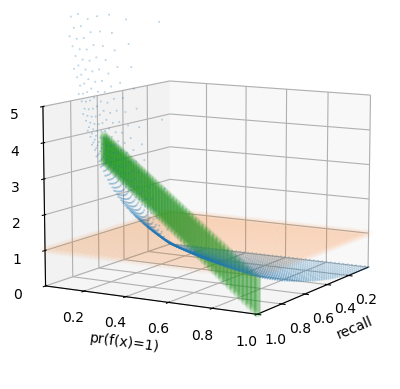

In [4]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter(whole_plane[:,0],whole_plane[:,1],
           image,
           s = 0.1)
ax.scatter(whole_plane[:,0],whole_plane[:,1], np.ones(whole_plane.shape[0]), alpha=0.02)
ax.scatter(bisx, bisx, plane+0.5, alpha=0.05)

ax.view_init(10, 30)
ax.set_xlim(0.01, 1)
ax.set_ylim(0.01, 1)
ax.set_zlim(0, 5)

ax.set_xlabel('recall')
ax.set_ylabel('pr(f(x)=1)')
ax.set_zlabel('estim')


In [5]:
#the green part is, in theory, a plane where x=y

In [6]:
xx, yy = np.meshgrid(np.linspace(0.001,1,500), np.linspace(0.001,1,500))
results_plot = np.empty(500**2)
for i in tqdm(range(500**2)):
    results_plot[i] = (np.c_[xx.ravel(), yy.ravel()][i,0]**2)/np.c_[xx.ravel(), yy.ravel()][i,1]

100%|██████████| 250000/250000 [04:02<00:00, 1030.32it/s]


In [7]:
qualitative_plot = np.empty(500**2)
for i in range(500**2):
    if results_plot[i]<=0.05:
        qualitative_plot[i] = 0
    elif 0.05<results_plot[i] and results_plot[i]<=0.15:
        qualitative_plot[i] = 1
    elif 0.15<results_plot[i] and results_plot[i]<=0.25:
        qualitative_plot[i] = 2
    elif 0.25<results_plot[i] and results_plot[i]<=0.4:
        qualitative_plot[i] = 3
    elif 0.4<results_plot[i] and results_plot[i]<=0.55:
        qualitative_plot[i] = 4
    elif 0.55<results_plot[i] and results_plot[i]<=0.8:
        qualitative_plot[i] = 5
    elif 0.8<results_plot[i] and results_plot[i]<=1:
        qualitative_plot[i] = 6
    elif 1<results_plot[i] and results_plot[i]<=5:
        qualitative_plot[i] = 7
    elif 5<results_plot[i]:
        qualitative_plot[i] = 8

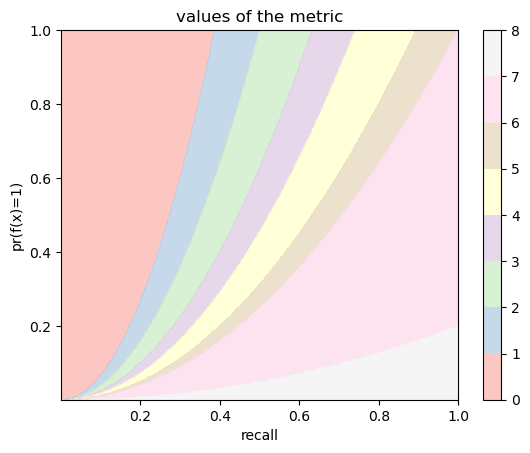

In [8]:
fig, ax = plt.subplots()
qualitative_plot = qualitative_plot.reshape(xx.shape)
plt.contourf(xx, yy, qualitative_plot, alpha=0.75, cmap=plt.cm.Pastel1)
plt.colorbar()
ax.set_xlabel('recall')
ax.set_ylabel('pr(f(x)=1)')
ax.set_title('values of the metric')
plt.savefig('plot of the weird values of the metric.png')
plt.show()

In [9]:
results_plot_bis = np.empty(500**2)
for i in tqdm(range(500**2)):
    results_plot_bis[i] = (np.c_[xx.ravel(), yy.ravel()][i,1]*np.c_[xx.ravel(), yy.ravel()][i,0]*2)/(np.c_[xx.ravel(), yy.ravel()][i,0]+np.c_[xx.ravel(), yy.ravel()][i,1])

qualitative_plot_bis = np.empty(500**2)
for i in range(500**2):
    if results_plot_bis[i]<=0.05:
        qualitative_plot_bis[i] = 0
    elif 0.05<results_plot_bis[i] and results_plot_bis[i]<=0.15:
        qualitative_plot_bis[i] = 1
    elif 0.15<results_plot_bis[i] and results_plot_bis[i]<=0.25:
        qualitative_plot_bis[i] = 2
    elif 0.25<results_plot_bis[i] and results_plot_bis[i]<=0.4:
        qualitative_plot_bis[i] = 3
    elif 0.4<results_plot_bis[i] and results_plot_bis[i]<=0.55:
        qualitative_plot_bis[i] = 4
    elif 0.55<results_plot_bis[i] and results_plot_bis[i]<=0.8:
        qualitative_plot_bis[i] = 5
    elif 0.8<results_plot_bis[i] and results_plot_bis[i]<=1:
        qualitative_plot_bis[i] = 6
    elif 1<results_plot_bis[i] and results_plot_bis[i]<=5:
        qualitative_plot_bis[i] = 7
    elif 5<results_plot_bis[i]:
        qualitative_plot_bis[i] = 8

100%|██████████| 250000/250000 [07:27<00:00, 558.63it/s]


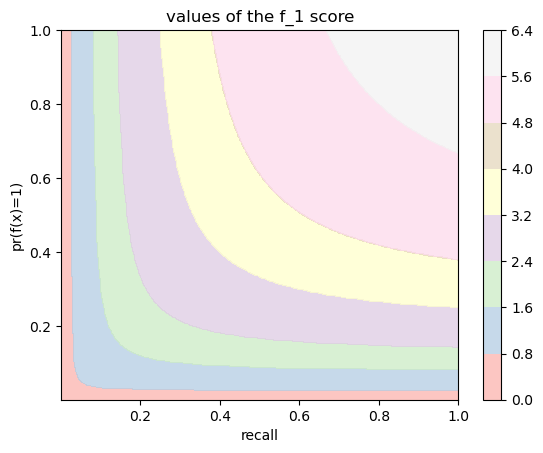

In [11]:
fig, ax = plt.subplots()
qualitative_plot_bis = qualitative_plot_bis.reshape(xx.shape)
plt.contourf(xx, yy, qualitative_plot_bis, alpha=0.75, cmap=plt.cm.Pastel1)
plt.colorbar()
ax.set_xlabel('recall')
ax.set_ylabel('pr(f(x)=1)')
ax.set_title('values of the f_1 score')
plt.savefig('plot of the values of the f_1 score.png')
plt.show()